# 2CSSID-TP03bis. Régression logistique Multinomiale

**INTRODUCTION**

Nous avons implémenté le cas d'une seule classe (binaire : oui ou non). Pour appliquer un classement sur plusieurs classes, on peut entrainner $L$ modèles de régression logistique (où $L$ est le nombre des classes). Dans ce cas, nos résultats (Y) doivent encodée en 0 et 1. Pour un modèle $M_i$ d'une classe $C_i$, la sortie $Y$ doit avoir 1 si $C_i$, 0 si une autre classe. (One-to-rest classification)

Une autre approche (celle qu'on va implémenter) est d'encoder la sortie en utilisant OneHot encoder. Pour $L$ classes et un échantillon donnée, on va avoir $L$ sorties (une ayant 1 et les autres 0). Pour un dataset avec $M$ échantillons, $N$ caractéristiques et $L$ classes, on va avoir les dimensions suivantes : 

- $X [M, N]$
- $Y [M, L]$
- $\theta [N, L]$

Cette dernière approche s'appelle maximum entropy (MaxEnt). C'est une généralisation de la régresion logistique binaire.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

In [ ]:
from typing import Tuple, List, Type

## I. Réalisation des algorithmes

Dans cette partie, on va essayer d'implémenter la régression multinomiale afin de mieux comprendre son principe. 
Pour ce faire, on va utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Combinaison linéaire

On combine linéairement les $N$  caractéristiques de la même façon que la régression linéaire binaire. 
La seule différence est que nous avons plus de classes, donc le nombre des paramètres va être multiplié par le nombre des classes.
La somme pondérée d'une classe $c$ est calculée selon la formule : 

$$Z_c = zfn_c(X, \theta) = \sum\limits_{j=0}^{N} \theta_{(c, j)} X_j | X_0 = 1 $$

La forme matricielle de $Z$ sera : 
$$Z = zfn(X, \theta) = X \cdot \theta$$

- $X[M, N]$ : une matrice de M lignes (échantillons) et N colonnes (caractéristiques, y compris le biais).  
- $\theta[N, L]$ : une matrice de N lignes (caractéristiques, y compris le biais) et L colonnes (classes). 
- $Z[M, L]$ : une matrice de M lignes (échantillons) et L colonnes (classes).

In [ ]:
# TODO implémenter la fonction de combinaison linéaire 
def zfn(X: np.ndarray, Theta: np.ndarray) -> np.ndarray: 
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0. , 0. , 0. ],
#        [0.5, 0.1, 0.6],
#        [0.2, 0.3, 0. ],
#        [0.7, 0.4, 0.6]])
#---------------------------------------------------------------------

X_tn = np.array([[0., 0.], 
                 [1., 0.], 
                 [0., 1.], 
                 [1., 1.]]) # 4 échntillons, 2 caractéristiques
Theta_tn = np.array([[0.5, 0.1, 0.6],
                     [0.2, 0.3, 0.0]]) # 2 caractéristiques, 3 classes
zfn(X_tn, Theta_tn)

### I.2. Calcul des probabilités

Les valeurs combinées sont transformées à des probabilités en utilisant la fonction softmax. 
La fonction softmax nous assure que la somme des probabilités des classes égale à 1.
Cette fonction prend les combinaisons linéaires $Z[M, L]$ et calcule les probabilités $P[M, L] comme suite : 

$$softmax(Z)=\frac{e^Z}{\sum\limits_{k=1}^{L} e^{Z_k}}$$

- $M$ nombre des échantillons
- $N$ nombre des caractéristiques
- $L$ nombre des classes
- La somme des probabilités de chaque ligne doit être 1

In [ ]:
# TODO compléter la fonction softmax
def softmax(Z: np.ndarray) -> np.ndarray:
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0.33333333, 0.33333333, 0.33333333],
#       [0.36029662, 0.24151404, 0.39818934],
#       [0.34200877, 0.37797814, 0.28001309],
#       [0.37797814, 0.28001309, 0.34200877]])
#---------------------------------------------------------------------
Z_tn = np.array([[0. , 0. , 0. ],
                 [0.5, 0.1, 0.6],
                 [0.2, 0.3, 0. ],
                 [0.7, 0.4, 0.6]])
softmax(Z_tn)

### I.3. Prédiction 

Etant donnée les probabilités des classes pour chaque échantillon, on doit choisir la classe avec le max de probabilité.

$$
\hat{C}^{(i)}_j = 
\begin{cases}
1 & si & H^{(i)}_j \ge \max P^{(i)}\\
0 & sinon & \\
\end{cases}
$$

- $H[M, L]$ probabilités où chaque ligne est yn échantillon et chaque collone est une classe
- $\hat{C}[M, L]$ prédictions où chaque ligne est yn échantillon et chaque collone est une classe. $\hat{C}^{(i)}_j \in \{0, 1\}$

In [ ]:
# TODO compléter la fonction de prédiction 
def cn(H: np.ndarray) -> np.ndarray: 
    res = np.zeros(H.shape)
    # ...
    return res

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[1, 0, 0],
#        [0, 0, 1],
#        [0, 1, 0],
#        [1, 0, 0]])
#---------------------------------------------------------------------

H_tn = np.array([[0.33333333, 0.33333333, 0.33333333],
             [0.36029662, 0.24151404, 0.39818934],
             [0.34200877, 0.37797814, 0.28001309],
             [0.37797814, 0.28001309, 0.34200877]])
cn(H_tn)

### I.4. Calcul du coût 

On réfère aux probabilités trouvées par la fonction softmax comme $H$, où $H_c$ est la probabilité d'une classe $c$.
Etant donné un échantillon $X^{(i)}$, son coût est calculé comme : 

$$ cout(H^{(i)}, Y^{(i)}) = - \sum\limits_{c=1}^{L} Y^{(i)}_c \log(H^{(i)}_c)$$

Le coût total est la moyenne des coût de tous les échantillons

$$J(H, Y) = \frac{1}{M} \sum\limits_{i=1}^{M} cout(H^{(i)}, Y^{(i)})$$

- $H[M, L]$ : les probabilités estimées de chaque échantillon (M) de chaque classe (L)
- $Y[M, L]$ : les probabilités réelles (1 ou 0) de chaque échantillon (M) de chaque classe (L)

In [ ]:
# TODO compléter la fonction du coût
def jn(H: np.ndarray, Y: np.ndarray, eps: float=1e-8) -> float: 
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 1.1913194196637922
#---------------------------------------------------------------------

H_tn = np.array([[0.33333333, 0.33333333, 0.33333333],
                 [0.36029662, 0.24151404, 0.39818934],
                 [0.34200877, 0.37797814, 0.28001309],
                 [0.37797814, 0.28001309, 0.34200877]])

Y_tn = np.array([[1, 0, 0], 
                 [0, 1, 0], 
                 [0, 0, 1], 
                 [1, 0, 0]])

jn(H_tn, Y_tn)

### I.5. Calcul des gradients

La taille des gradients est la même que celle des paramètres $\theta[N, L]$. 

$$\frac{\partial J}{\theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X^{(i)}_{j} $$

Sa forme matricielle sera 
$$\frac{\partial J}{\theta_j} = \frac{1}{M} X^\top \cdot (H-Y) $$

- $X[M, N]$ : une matrice de M lignes (échantillons) et N colonnes (caractéristiques, y compris le biais).  
- $H[M, L]$ : les probabilités estimées de chaque échantillon (M) de chaque classe (L)
- $Y[M, L]$ : les probabilités réelles (1 ou 0) de chaque échantillon (M) de chaque classe (L)
- $\frac{\partial J}{\theta}[N, L]$ : une matrice de L lignes (classes) et N colonnes (caractéristiques, y compris le biais). 

In [ ]:
# TODO compléter le gradient de la fonction softmax
def dJn(X: np.ndarray, H: np.ndarray, Y: np.ndarray) -> np.ndarray:
    return  None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[-0.06543131, -0.11961822,  0.18504953],
#        [-0.07000327,  0.16449781, -0.09449454]])
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], 
                 [1., 0.], 
                 [0., 1.], 
                 [1., 1.]])

H_tn = np.array([[0.33333333, 0.33333333, 0.33333333],
                 [0.36029662, 0.24151404, 0.39818934],
                 [0.34200877, 0.37797814, 0.28001309],
                 [0.37797814, 0.28001309, 0.34200877]])

Y_tn = np.array([[1, 0, 0], 
                 [0, 1, 0], 
                 [0, 0, 1], 
                 [1, 0, 0]])

dJn(X_tn, H_tn, Y_tn)

### I.6. Regrouper les fonctions ensemble 

**Rien à programmer ici**

Pour bien gérer l'entrainnement et la prédiction, on rassemble les fonctions que vous avez implémenté dans une seul classe. L'intérêt : 
- Si on applique la normalisation durant l'entrainnement, on doit l'appliquer aussi durant la prédiction. En plus, on doit utiliser les mêmes paramètres (moyenne et écart-type)
- On utilise les thétas optimales lors de la prédicition


#### I.6.1. Descente des gradients

In [ ]:
def des_grad(X, Y, Theta, max_iter=200, alpha=0.1):
    
    couts = []
    
    Theta = Theta.copy() # pour ne pas modifier Theta original
    
    for i in range(max_iter): # Ici, la seule condition d'arrêt est le nombre des itérations
        H = softmax(zfn(X, Theta))
        couts.append(jn(H, Y))
        Theta = Theta - alpha * dJn(X, H, Y)
    
    return Theta, couts


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([[ 0.84298097,  1.57919742, -1.22217839],
#         [ 0.60036187, -1.45101777,  1.3506559 ]]),
#  0.5977646723518713)
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], 
                 [1., 0.], 
                 [0., 1.], 
                 [1., 1.]]) # deux variables logiques

Y_tn = np.array([[1, 0, 0], 
                 [0, 1, 0], 
                 [0, 0, 1], 
                 [1, 0, 0]]) # égale, sup, inf, égale

Theta_tn = np.array([[0.5, 0.1, 0.6],
                     [0.2, 0.3, 0.0]]) # 2 caractéristiques, 3 classes

theta_n, couts_n = des_grad(X_tn, Y_tn, Theta_tn)

theta_n, couts_n[-1]

#### I.6.2. Fonctions supplimentaires

In [9]:
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    X_norm = np.where(std==0, X, (X - mean)/std)
    return X_norm, mean, std

def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre,mean=mean, std=std)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0],1)), X_pre ,axis=1)
    return X_pre, mean, std

def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)

#### I.6.3. Classe pour MaxEnt

In [ ]:
class MaxEnt(object):
    
    def __init__(self, norm=True, const=True): 
        self.norm = norm
        self.const = const
    
    def entrainer(self, X, Y, max_iter=100, alpha=.01, adagrad=False): 
        X_pre, self.mean, self.std = preparer(X, norm=self.norm, const=self.const)
        Theta = np.zeros((X_pre.shape[1], Y.shape[1])) # Theta[N, L]
        self.Theta, self.couts = des_grad(X_pre, Y, Theta, max_iter=max_iter, alpha=alpha)
        
        
    # La prédiction
    # si prob=True elle rend un vecteur de probabilités
    # sinon elle rend une vecteur de 1 et 0
    def predire(self, X, prob=True):
        X_pre, self.mean, self.std = preparer(X, norm=self.norm, const=self.const, mean=self.mean, std=self.std)
        H = softmax(zfn(X_pre, self.Theta))
        if prob:
            return H
        return cn(H)


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[1, 0, 0],
#        [0, 1, 0],
#        [0, 1, 0],
#        [0, 0, 1]])
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], 
                 [1., 0.], 
                 [0., 1.], 
                 [1., 1.]]) # deux variables logiques

Y_tn = np.array([[1, 0, 0], 
                 [0, 1, 0], 
                 [0, 0, 1], 
                 [1, 0, 0]]) # égale, sup, inf, égale

X_testn = np.array([[2., 2.], 
                    [1., 0.], 
                    [1., -1.], 
                    [2., 5.]])

maxent = MaxEnt()
maxent.entrainer(X_tn, Y_tn)
maxent.predire(X_testn, prob=False)

## II. Application et analyse

On va utiliser [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) pour classer des fleurs en trois classes, en utilisant 4 caractéristiques. Pour simplification, on va utiliser seulement 2 caractéristiques: Petal Length (cm); Petal Width (cm). D'après [Ce tutoriel](https://teddykoker.com/2019/06/multi-class-classification-with-logistic-regression-in-python/) ces 2 caractéristiques sont suffisantes.

**Dans cette partie, vous n'avez rien à programmer. Mais, il faut analyser les résultats à la fin**

Deux solutions à analyser : 
- Entrainer 3 modèles de régression logistique binaire
- Entrainer 1 modèle de régression logistique multinomial 

In [11]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

iris_data = iris.data

iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# On va garder seulement les informations "petal"
Xiris = iris_data.iloc[:, 2:].values # Deux dernières colonnes

Xiris[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [13]:
iris_target = iris.target
iris_target_names = iris.target_names

iris_target, iris_target_names

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int64,
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [14]:
Yiris = iris_target.iloc[:].values # Les classes

Yiris[0:5]

array([0, 0, 0, 0, 0])

### II.1. Séparabilité des classes

Ici, on veut juger si les classes sont séparables visuellement.

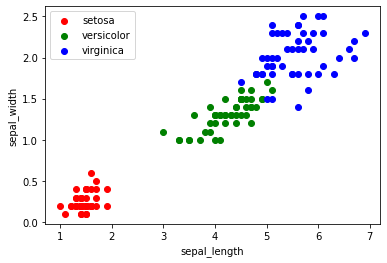

In [15]:
couleurs = ['red', 'green', 'blue']
for i in range(len(iris_target_names)):
    idx = Yiris == i
    plt.scatter(Xiris[idx, 0], Xiris[idx, 1], color=couleurs[i], label=iris_target_names[i])
    
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous concernant la séparabilité des 3 classes?
- Donner une hypothèse concernant la performance des modèles sur ce dataset (Rappel, Précision)
- Justifier cette hypothèse (Rappel, Précision) en comparant les 3 classes

**Réponse**

- ...
- ...
- ...

### II.3. One-vs-Rest OU One-vs-One

Nous avons entrainé deux modèles : 

- **One-vs-Rest** : ici, trois sous-modèles binaires sont entraînés ; un pour chaque class. Chaque sous modèle détecte si l'échantillon appartient à sa classe ou non. Lors de la prédiction, on prend la classe avec le max de probabilité
- **One-vs-One** : ici, un modèle de régression logistique multinomiale (maximum entropy) est entraîné pour séparer les trois classes

In [16]:
from sklearn.model_selection import train_test_split  

Xiris_train, Xiris_test, Yiris_train, Yiris_test = train_test_split(Xiris, Yiris, test_size=0.2, random_state=0)  

len(Xiris_train), len(Xiris_test)

(120, 30)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

one2rest = LogisticRegression(solver="lbfgs", penalty="none", multi_class="ovr")
one2rest.fit(Xiris_train, Yiris_train)

one2one = LogisticRegression(solver="lbfgs", penalty="none", multi_class="multinomial")
one2one.fit(Xiris_train, Yiris_train)

print("One-vs-Rest")
print(classification_report(Yiris_test, one2rest.predict(Xiris_test)))

print("One-vs-One")
print(classification_report(Yiris_test, one2one.predict(Xiris_test)))

One-vs-Rest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

One-vs-One
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**TODO: Analyser les résultats**

On remarque que la performance de One-vs-One est meilleure que celle de One-vs-Rest

- Pourquoi ? (en se basant sur la limite de décision et les paramètres)
- Quel mécanisme de ces deux (One-vs-One, One-vs-Rest) est affecté beaucoup plus par les valeurs aberrantes (les échantillons d'une classe qui peuvent se retrouver aux milieu d'une autre classe)

**Réponse**

- ...
- ...